In [31]:
# https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data = data.dropna(axis=1) #убираем столец без данных NaN
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category") # берём первое слово из названия округа
data = data.set_index(["YEAR"])

print (data.head())

             ID                                           EDU_NAME  global_id  \
YEAR                                                                            
2016-2017  8236  Государственное бюджетное общеобразовательное ...  797946035   
2016-2017  8237  Государственное казенное общеобразовательное у...  797949150   
2016-2017  8238  Государственное казенное общеобразовательное у...  797949275   
2016-2017  8239  Частное учреждение общеобразовательная организ...  797949425   
2016-2017  8240  Автономная некоммерческая организация средняя ...  797949570   

             AdmArea                   District  PASSES_OVER_220  \
YEAR                                                               
2016-2017  Восточный          район Богородское                5   
2016-2017  Восточный          район Богородское               14   
2016-2017  Восточный              район Вешняки                0   
2016-2017  Восточный              район Вешняки                0   
2016-2017  Восточный  ра

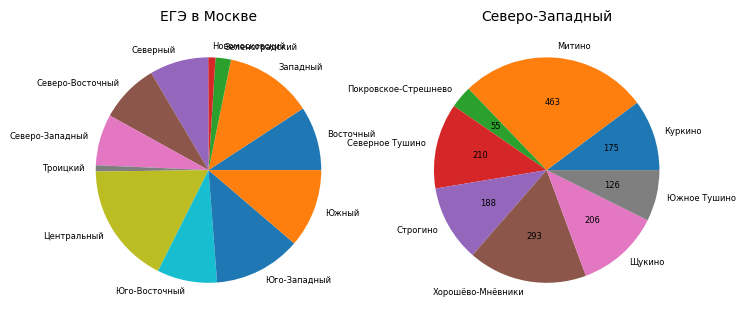

District
Куркино                 175
Митино                  463
Покровское-Стрешнево     55
Северное Тушино         210
Строгино                188
Хорошёво-Мнёвники       293
Щукино                  206
Южное Тушино            126
Name: PASSES_OVER_220, dtype: int64


In [38]:
data2 = data.loc["2018-2019"].reset_index() # выбираем нужные учебный год,

fig = plt.figure(figsize=(8,8))
area = fig.add_subplot(1, 2, 1)
data2 = data2.set_index(["AdmArea"])
data2["PASSES_OVER_220"].groupby("AdmArea").sum().plot.pie(ax=area, label="",fontsize=6) #первый график
area.set_title("ЕГЭ в Москве", fontsize=10)

data_SZ = data2.loc["Северо-Западный"].reset_index() # нужный округ
data_SZ["District"] = data_SZ["District"].str.replace("район ","").astype("category") # заменяем слово "район " на "" 
area = fig.add_subplot(1, 2, 2)
data_SZ = data_SZ.set_index(["District"])
area.set_title("Северо-Западный", fontsize=10)
data_SZ = data_SZ["PASSES_OVER_220"].groupby("District").sum()
sum_dat = sum(data_SZ)
data_SZ.plot.pie(ax=area, label="",autopct=lambda x:int(round(sum_dat * x/100)),fontsize=6) #второй график
plt.show()
print(data_SZ)
